<h2 align="center">Effect of COVID-19 on 20 tech stocks</h2>
<p> COVID-19 has changed our lives. We are in lockdown, and have had to make major changes to our lifestyles. The stock market has had to deal with some drastic changes of its own. In this project I will explore the fate of some of tech stocks to see how good (or bad) they have braved the COVID-19 storm.

Disclaimer: this project is meant for some basic pandas and viz skills practice and **should not** be used to derive any financial advice. </p>

In [1]:
%%html
<style type="text/css">

 body {
     background-color: #4CB1F7;
     margin: 0;
     padding: 6em;
     font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
     font-size: 1em;
}



 h2 {
     color: #0339A6;
     height: 3em;
     width: 100%;
     margin-bottom: 1em;
     font-size: 2em;  
 }

div.output_area {
    width: 100%;
    font-size: 1.1em;
    color: #565656;
}

div.output_area pre {
    font-size: 1.1em;
    padding: 1.5em;
}

div.output_png.output_subarea {
    max-width: 100%;
}

</style>

In [2]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2023-05-04 at 12:54:06


### Get the Data

In this section I use pandas to scrape data from Yahoo! finance using pandas.

In [9]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

The stock data for these tickers are queried from Jan 1st 2017 to current date and saved in their own dataframes.

stock tickers are as follows:
MSFT, AAPL, AMZN, GOOG, BABA, FB, INTC, NVDA, CRM, PYPL, TSLA, AMD, EA, MTCH, TTD, ZG, ATVI, YELP, TIVO, ZM and VMW

In [10]:
start = datetime.datetime(2017, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['MSFT','AAPL','AMZN','GOOG','BABA','META','INTC','NVDA','CRM','PYPL','TSLA','AMD','EA','MTCH','TTD','ZG',
           'ATVI','YELP','ZM','VMW', 'DBX', 'ADBE']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

#### Using pd.concat to concatenate the stock dataframes together to a single data frame called tech_stocks

In [11]:
tech_stocks = pd.concat(df_map,axis = 1,keys = tickers)
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks.tail()

Stock Ticker        MSFT                                                  \
Stock Info          Open        High         Low       Close   Adj Close   
Date                                                                       
2023-04-27    295.970001  305.200012  295.250000  304.829987  304.829987   
2023-04-28    304.010010  308.929993  303.309998  307.260010  307.260010   
2023-05-01    306.970001  308.600006  305.149994  305.559998  305.559998   
2023-05-02    307.760010  309.179993  303.910004  305.410004  305.410004   
2023-05-03    306.619995  308.609985  304.089996  304.399994  304.399994   

Stock Ticker                  AAPL                                      ...  \
Stock Info      Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2023-04-27    46462600  165.190002  168.559998  165.190002  168.410004  ...   
2023-04-28    36446700  168.490005  169.850006  167.880005  169.679993  ...   
2023-05-01    21294100  169.279999  170.449997  168.639999  169.589996  ...   
2023-05-02    26404400  170.089996  170.350006  167.539993  168.539993  ...   
2023-05-03    22360800  169.500000  170.919998  167.160004  167.449997  ...   

Stock Ticker        DBX                                         ADBE  \
Stock Info          Low      Close  Adj Close     Volume        Open   
Date                                                                   
2023-04-27    20.020000  20.160000  20.160000  8403500.0  365.940002   
2023-04-28    19.930000  20.340000  20.340000  3324400.0  371.420013   
2023-05-01    20.139999  20.350000  20.350000  3130900.0  376.510010   
2023-05-02    19.770000  20.030001  20.030001  4570900.0  374.359985   
2023-05-03    19.870001  19.879999  19.879999  3210200.0  363.489990   

Stock Ticker                                                           
Stock Info          High         Low       Close   Adj Close   Volume  
Date                                                                   
2023-04-27    373.820007  363.500000  371.420013  371.420013  2338800  
2023-04-28    377.690002  368.559998  377.559998  377.559998  2061200  
2023-05-01    378.720001  373.709991  374.149994  374.149994  1868000  
2023-05-02    375.850006  367.839996  368.660004  368.660004  2287600  
2023-05-03    365.959991  344.239990  345.250000  345.250000  6700800  

[5 rows x 132 columns]

What is the maximum and minimum of the Close price for each tech company's stock throughout the time period? Let's also use a bar plot to visualize the data as well.

Note: We use a log scale for close price to normalize the values to a uniform scale.

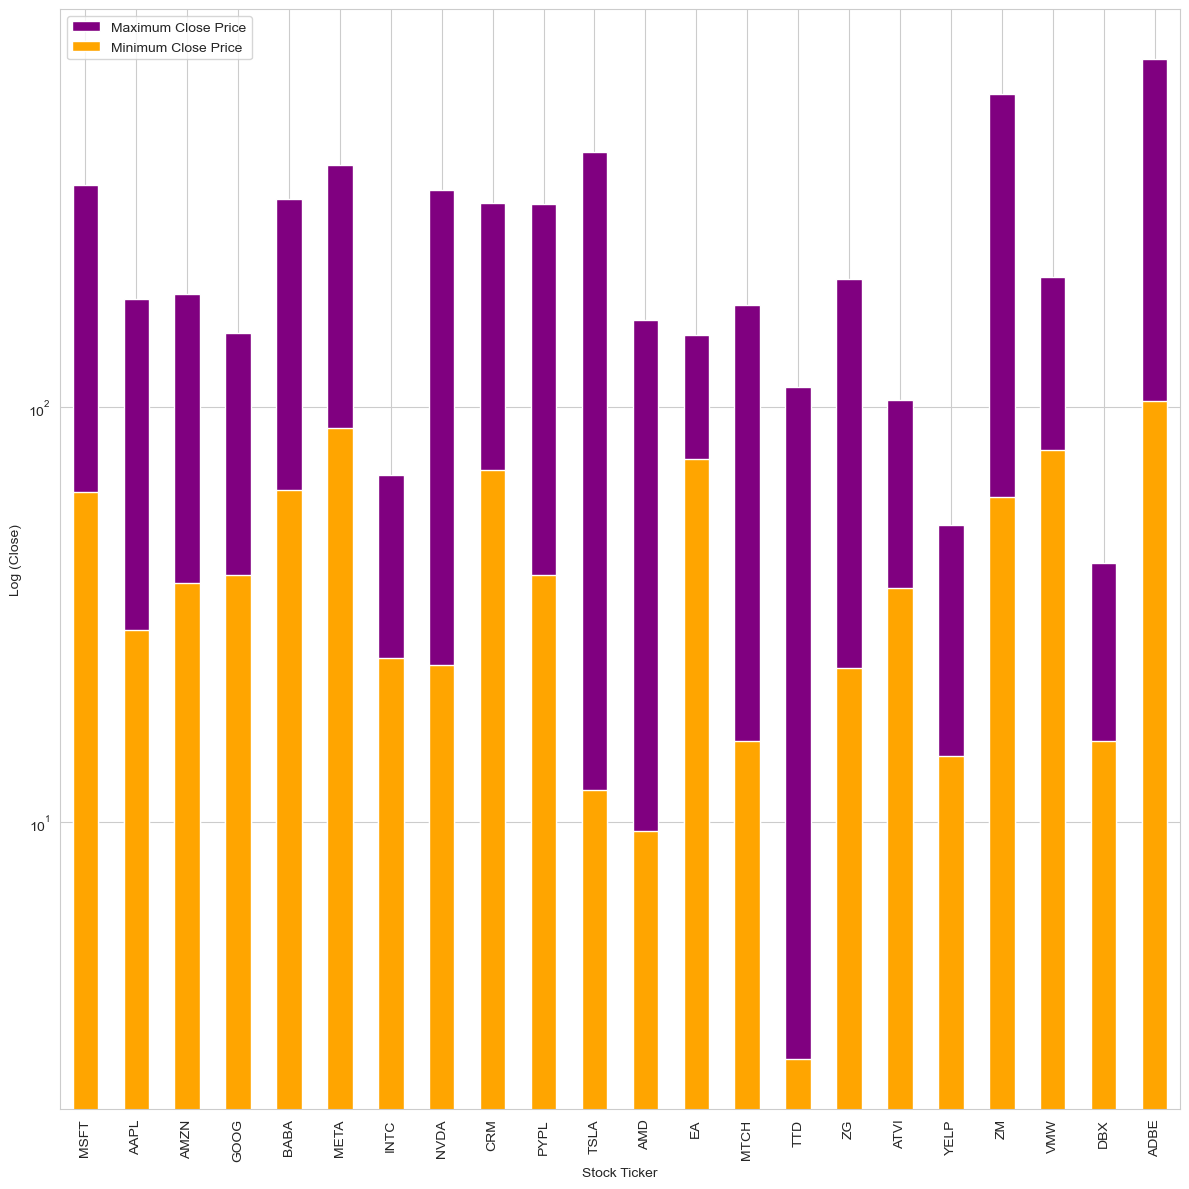

In [12]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
max_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()
min_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').min()
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='purple',label='Maximum Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Close Price')
plt.legend()
plt.tight_layout()

Using the bar-plot above, stocks can be classified into two broad groups: Reliable stocks and Volatile stocks. 

**Reliable stocks** are the ones that didnot show much difference between the minimum Close price and maximum Close Price in the time period specified. e.g.: GOOG and AMZN. 
**Volatile stocks** are the ones that fluctate the most between the minimum and maximum closing price of stocks. e.g.: TTD and TIVO

However, a more interesting comparison is to compare the same data against two separate time-periods: Pre-COVID-19 and Post-COVID-19.

Text(0.5, 1.0, 'Post COVID-19: Jan 2020 - Today')

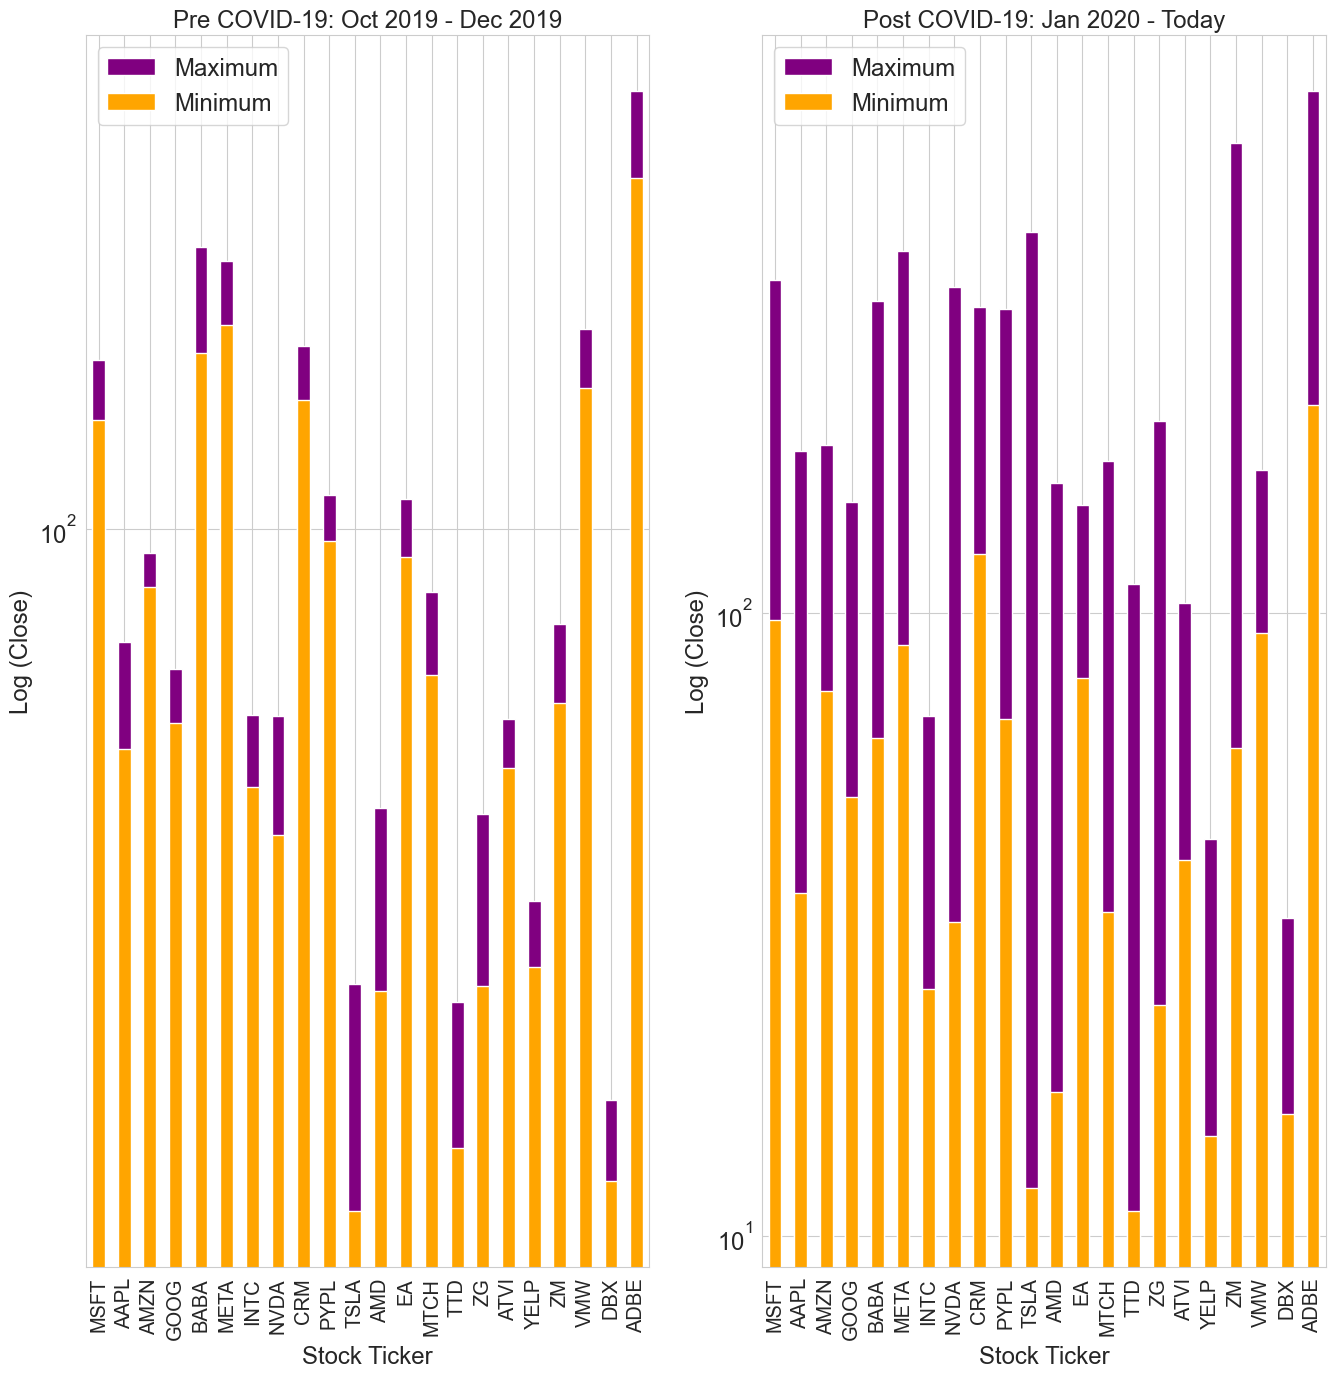

In [13]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
current_date_str = datetime.date.today().strftime("%Y-%m-%d") #to store the current date as a string
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,16))


max_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].max()
min_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='purple')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Pre COVID-19: Oct 2019 - Dec 2019')

max_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2020-01-01':current_date_str].max()
min_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':current_date_str].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='purple')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('Post COVID-19: Jan 2020 - Today')


It is clear that the more **Reliable** stocks like AAPL and AMZN in the pre COVID-19 period saw significant volatility in their closing prices once the COVID-19 storm hit.    

The next analysis is to use pandas pct_change() method on the Close column to create a **Returns** value. A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [14]:
returns = pd.DataFrame() #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.tail()

,MSFT Return,AAPL Return,AMZN Return,GOOG Return,BABA Return,META Return,INTC Return,NVDA Return,CRM Return,PYPL Return,...,EA Return,MTCH Return,TTD Return,ZG Return,ATVI Return,YELP Return,ZM Return,VMW Return,DBX Return,ADBE Return
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-27,0.032028,0.028395,0.046104,0.037530,0.019923,0.139255,0.027883,0.010016,0.023079,0.030669,...,0.011109,0.056142,0.070333,0.023553,0.010415,0.035026,-0.002279,0.008348,-0.034945,0.023027
2023-04-28,0.007972,0.007541,-0.039792,-0.001384,0.002604,0.007378,0.040188,0.019210,0.012402,0.023293,...,0.006086,0.054587,0.001869,0.025407,0.001288,0.012521,0.002284,0.004983,0.008929,0.016531
2023-05-01,-0.005533,-0.000530,-0.032243,-0.004713,-0.006258,0.011901,-0.024469,0.041839,-0.002924,-0.011711,...,0.001100,-0.025203,-0.021759,0.010986,-0.003603,0.000334,0.004070,0.015596,0.000492,-0.009032
2023-05-02,-0.000491,-0.006191,0.015483,-0.016062,-0.031250,-0.016202,-0.017492,-0.024213,-0.019971,-0.037678,...,-0.009889,-0.038365,-0.005720,-0.026127,-0.018468,-0.041764,-0.007944,-0.024413,-0.015725,-0.014673
2023-05-03,-0.003307,-0.006467,0.000193,0.001321,-0.000613,-0.009238,0.029560,-0.014463,-0.006345,-0.011760,...,-0.008640,-0.029488,-0.001119,-0.015432,-0.010132,-0.037308,-0.006047,-0.003148,-0.007489,-0.063500


A looks at the minimum and maximum returns for each stock tick in this time-period:

In [15]:
returns.idxmin()

MSFT Return   2020-03-16
AAPL Return   2020-03-16
AMZN Return   2022-04-29
GOOG Return   2020-03-16
BABA Return   2020-12-24
META Return   2022-02-03
INTC Return   2020-03-16
NVDA Return   2018-11-16
CRM Return    2020-03-16
PYPL Return   2022-02-02
TSLA Return   2020-09-08
AMD Return    2017-05-02
EA Return     2019-02-06
MTCH Return   2018-05-01
TTD Return    2021-05-10
ZG Return     2018-11-07
ATVI Return   2021-11-03
YELP Return   2018-11-09
ZM Return     2020-11-09
VMW Return    2018-01-29
DBX Return    2019-08-09
ADBE Return   2022-09-15
dtype: datetime64[ns]

It is interesting to note that most of these stocks had their lowest return in March 2020

In [16]:
returns.idxmax()

MSFT Return   2020-03-13
AAPL Return   2020-03-13
AMZN Return   2022-02-04
GOOG Return   2019-07-26
BABA Return   2022-03-16
META Return   2023-02-02
INTC Return   2020-03-13
NVDA Return   2017-05-10
CRM Return    2020-08-26
PYPL Return   2020-03-24
TSLA Return   2020-02-03
AMD Return    2019-01-30
EA Return     2019-02-08
MTCH Return   2019-08-07
TTD Return    2018-05-11
ZG Return     2019-02-22
ATVI Return   2022-01-18
YELP Return   2017-08-04
ZM Return     2020-09-01
VMW Return    2022-05-23
DBX Return    2020-02-21
ADBE Return   2020-03-13
dtype: datetime64[ns]

And for some, their highest returns were seen in March 2020 as well thereby confirming that the COVID-19 has indeed rendered the stock market more unpredictable than in the recent past.

Now, two new series, named `pre_corona` and `post_corona` are initialised with the standard deviation of stock returns from October - December 2019 and standard deviation of stock returns from January - March 2020, respectively. This series is sorted and hence if the stocks occur at the right end of the chart, they are deemed **volatile** with significant values of standard deviation whereas if they occur on the left they could be deemed **reliable**.

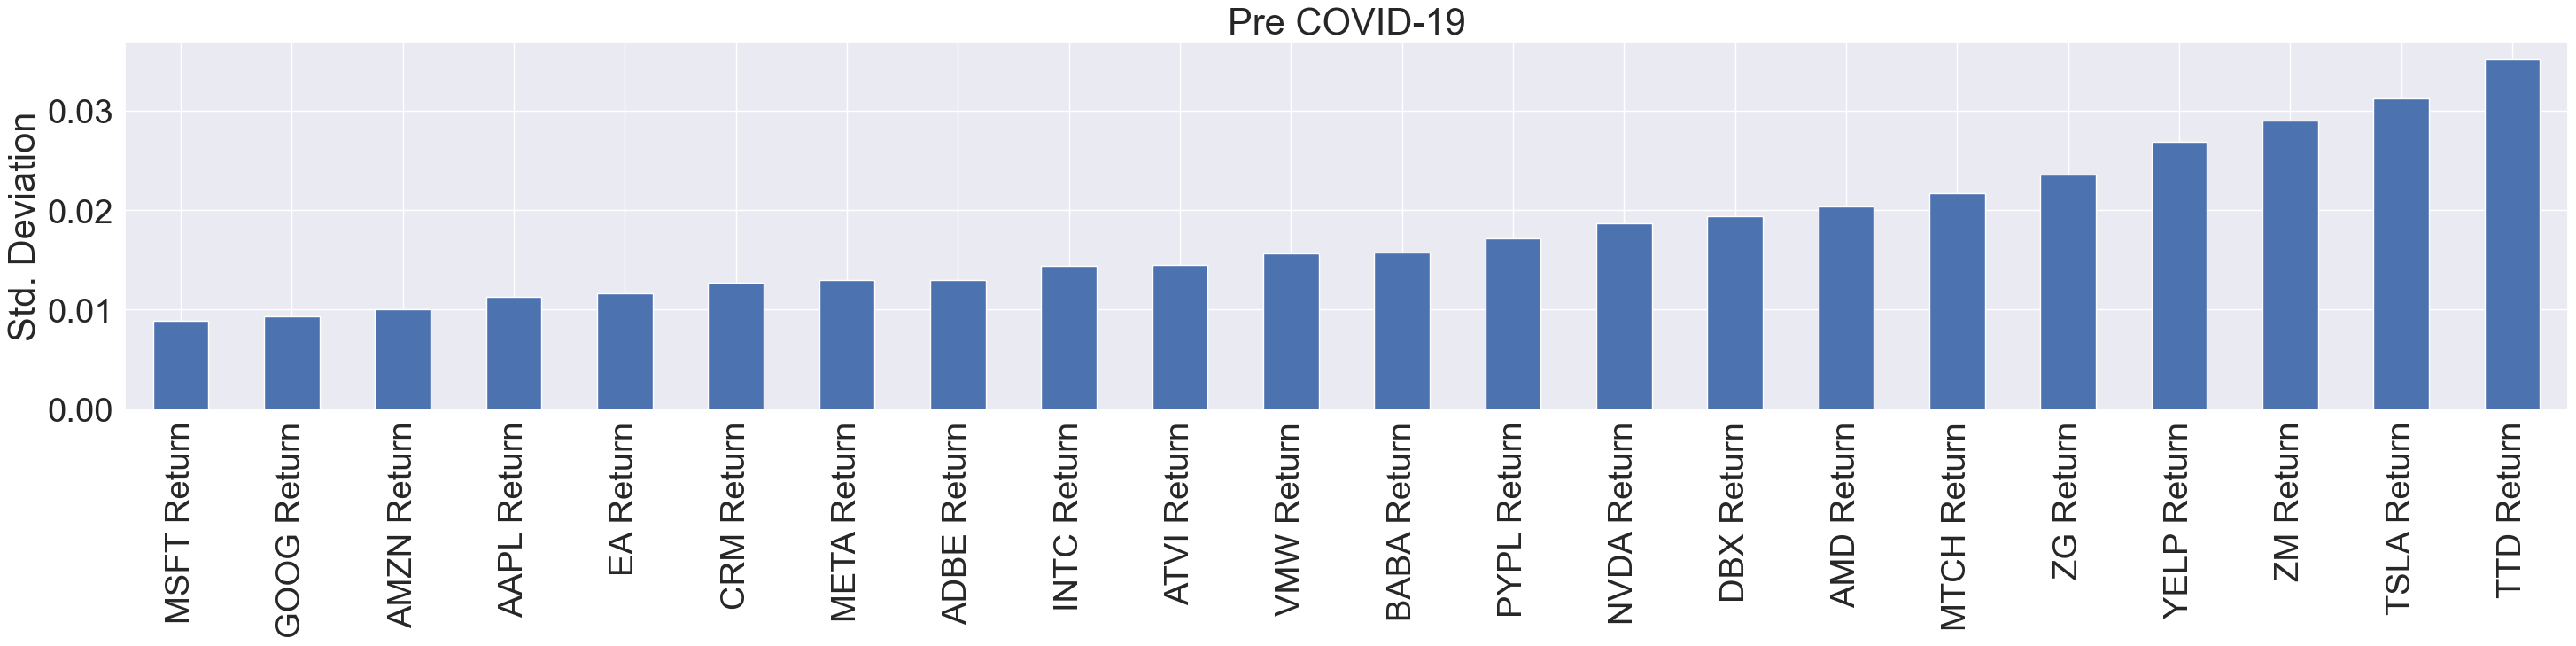

In [17]:
pre_corona=returns.loc['2019-10-01':'2019-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
pre_corona.sort_values().plot.bar(title="Pre COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

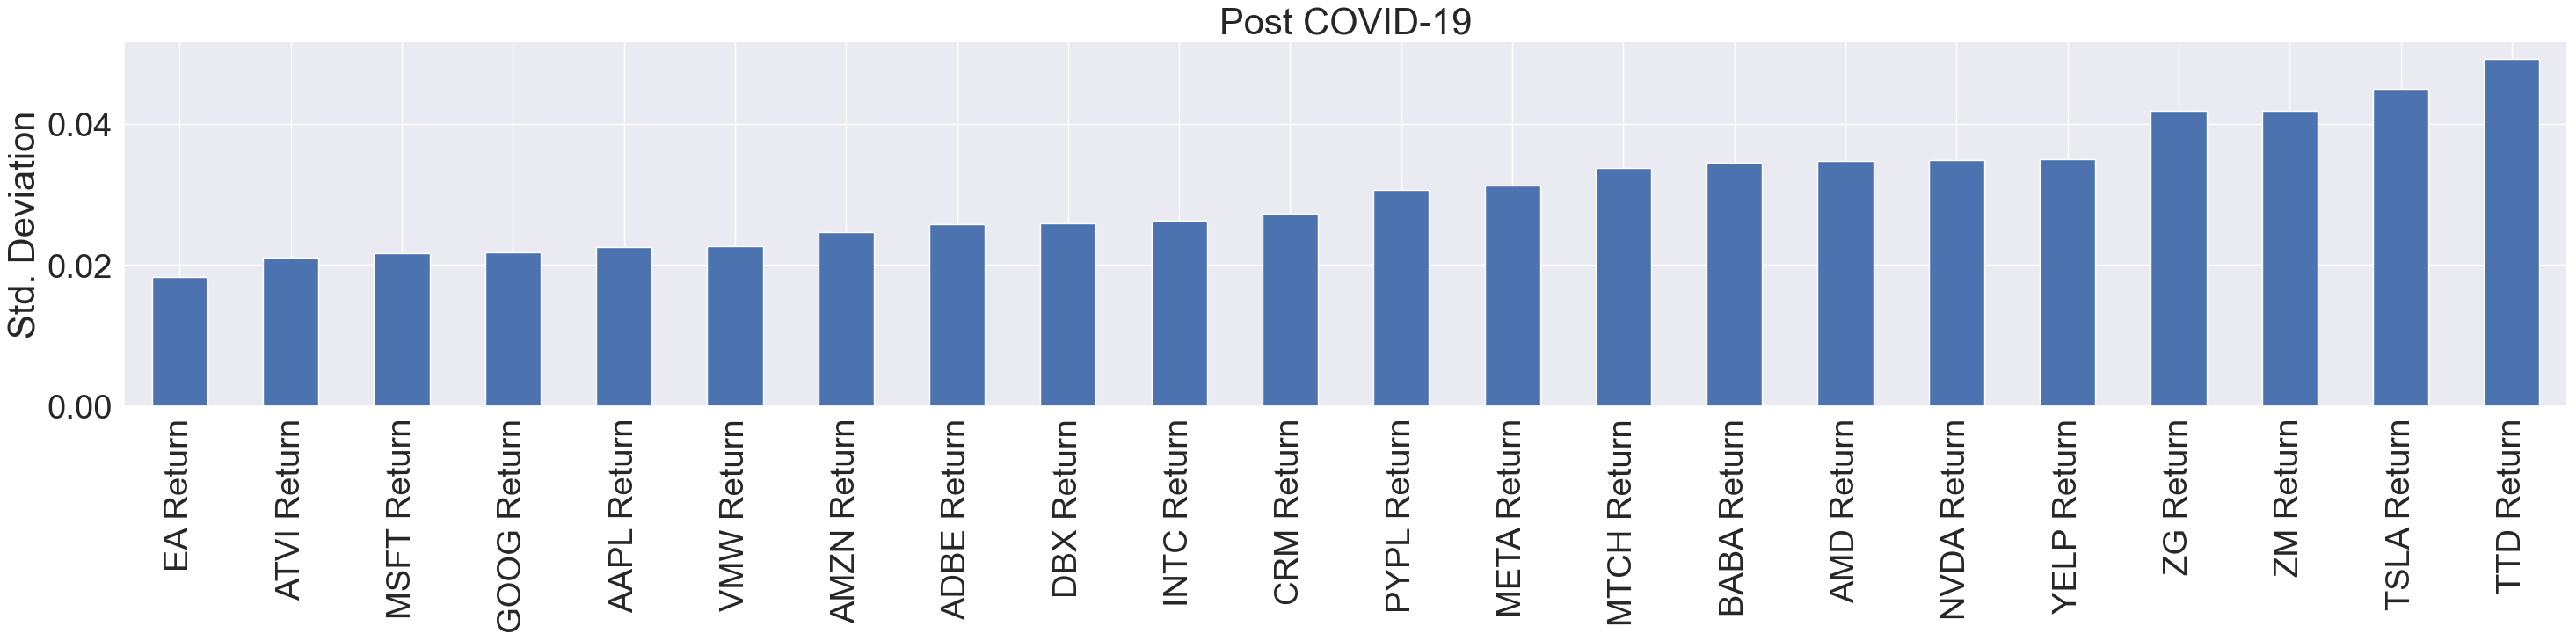

In [18]:
post_corona=returns.loc['2020-01-01':current_date_str].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
post_corona.sort_values().plot.bar(title="Post COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

It is clear that MSFT has suffered the most - shifting from the most **reliable** stock to a relatively **volatile** stock due to this pandemic!

From the above collection, let's choose 5 stocks that have suffered significant effects. I am picking the following - MSFT, BABA, AAPL, MTCH and ZM. Interesting is the irregularity of ZM stocks (that provides a video conferencing service) which shot up to being a necessary tool for all kinds of Work from Home requirements. 

In [21]:
selected_tickers = ['MSFT', 'BABA', 'AAPL', 'MTCH','ZM', 'DBX','META']
selected_tech_stocks = pd.concat([df_map['MSFT'],df_map['BABA'],df_map['AAPL'],df_map['MTCH'],df_map['ZM'],df_map['DBX'],df_map['META']],axis=1,keys=selected_tickers)
selected_tech_stocks.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':current_date_str].iplot(width=3.5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.tight_layout()

Finally: Using a heatmap of the correlation between the selected stocks Close Price

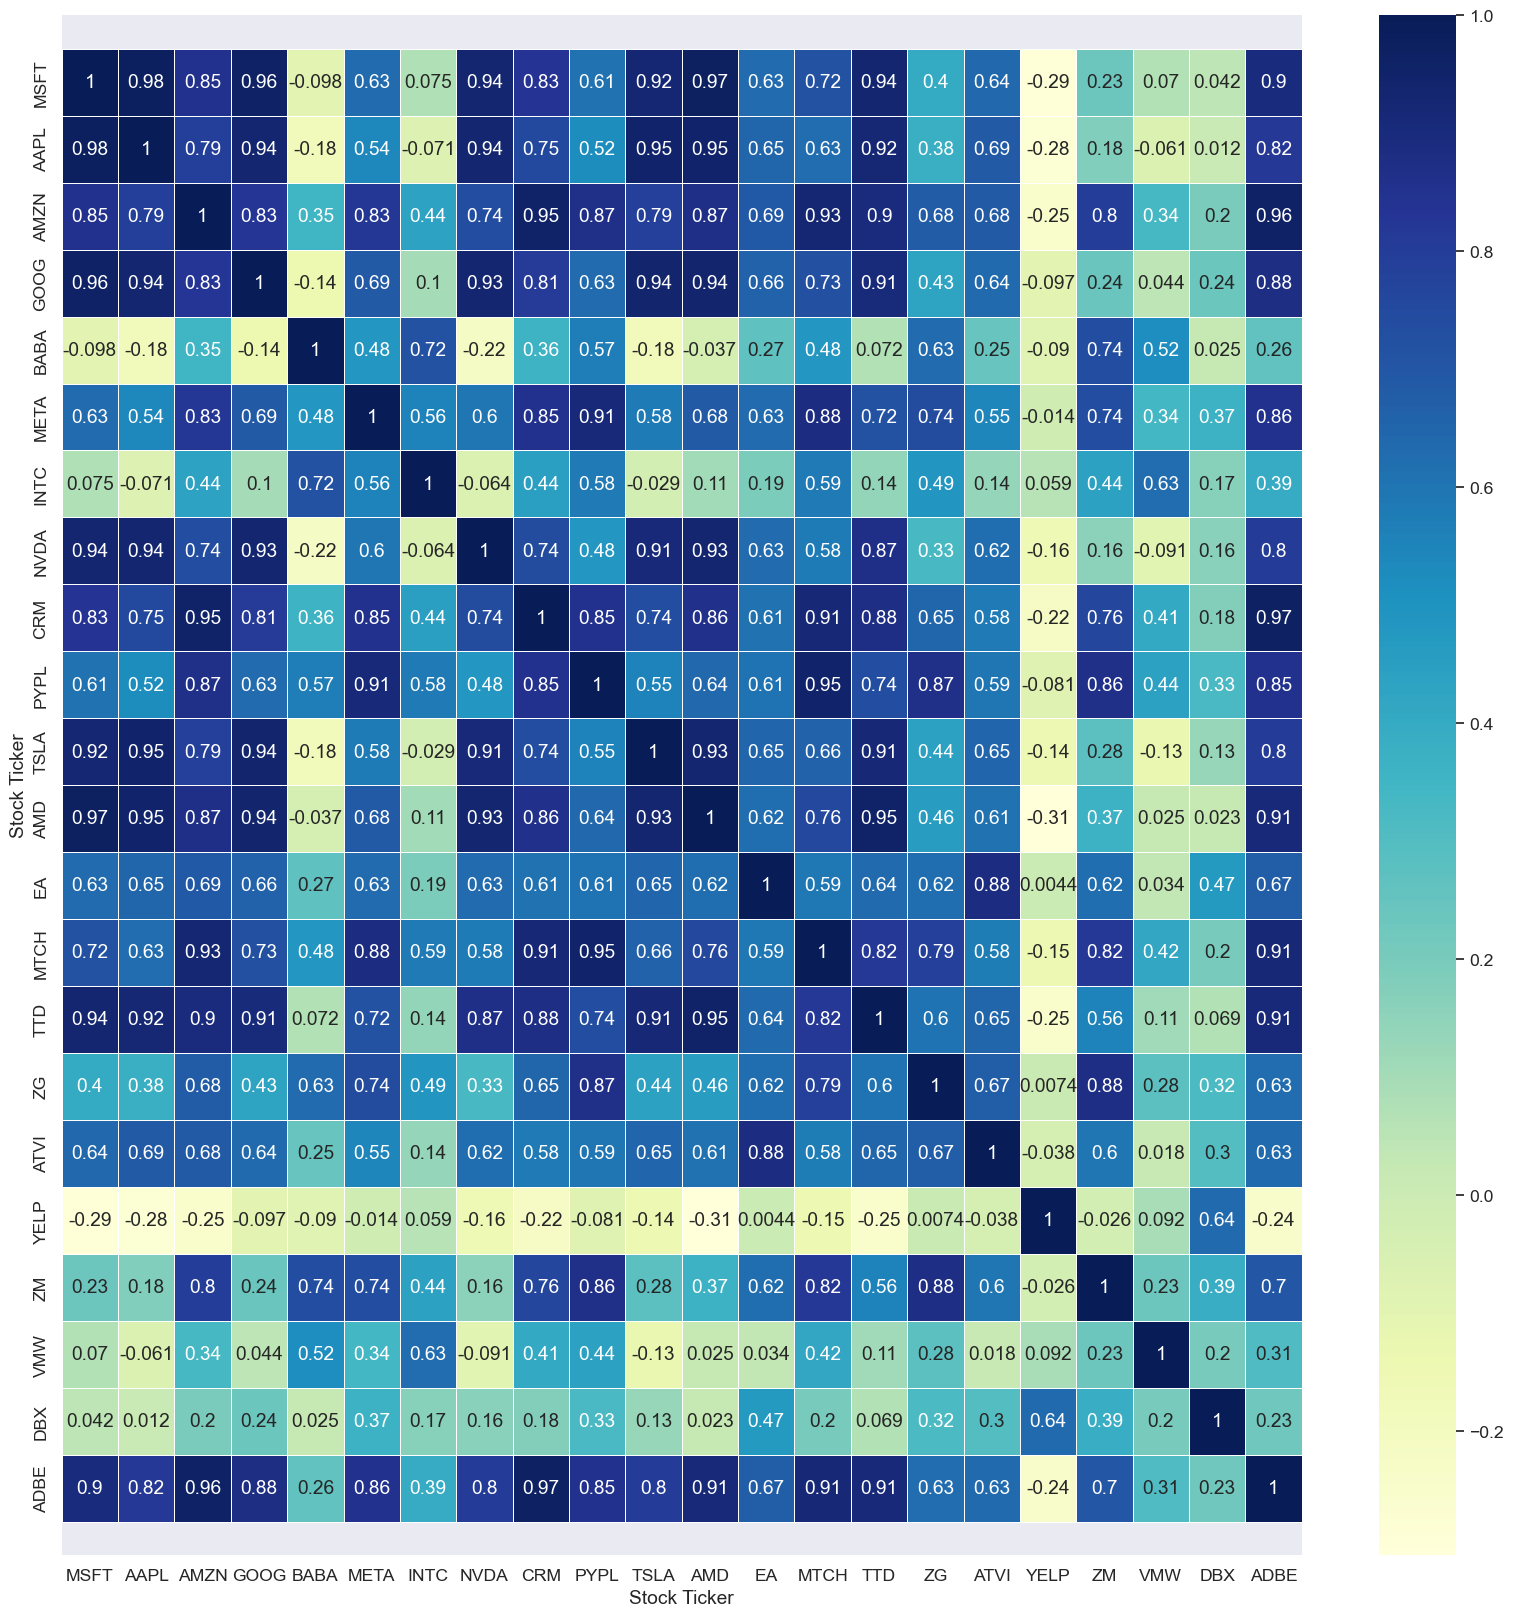

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),linewidths=.5,cmap='YlGnBu',annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()